In [1]:
!pip install numba

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

In [0]:
def euclidean_distance(x1, y1, x2, y2):
    ''' Computes Euclidean distance between (x1, y1) and (x2, y2)
    '''
    return np.sqrt((x1 - x2)**2 + (y1 - y2) ** 2)


def city_distance(i, j, cities):
    ''' Computes Euclidean distance between city i and j
    using the coordinates given in the 2D array cities
    '''
    return euclidean_distance(cities[i, 0],
                              cities[i, 1],
                              cities[j, 0],
                              cities[j, 1])


def plot_cities(cities, style='ro'):
    ''' Plots a list of cities with the style given in 'style'
    '''    
    plt.plot(cities[:,0], cities[:,1], style)

def plot_tour(tour, cities):
    ''' Plots the tour given in 'tour' based on the city coordinates
    given in 'cities'
    '''
    n_cities = cities.shape[0]
    new_cities = np.empty((n_cities + 1, 2))
    new_cities[:n_cities,:] = cities[tour,:]
    new_cities[n_cities:,:] = cities[tour[0],:]
    plot_cities(new_cities, style='ro-')

def generate_cities(how_many):
    '''
    Generates coordinates for a number of cities
    controlled by "how_many" uniformly distributed
    in an unit square
    '''
    return np.random.random((how_many, 2))

def calculate_od_matrix(cities):
    n_cities = cities.shape[0]
    od_matrix = np.zeros((n_cities, n_cities))
    for i in range(n_cities):
        od_matrix[:,i] = (cities[:,0] - cities[i,0])**2 + (cities[:,1] - cities[i,1])**2
    
    return np.sqrt(od_matrix)

In [0]:
def flip_ud(input_array):
  '''
  Quick implementaiton of flip_ud from
  Numpy to work with Numba
  '''
  new_array = np.empty(input_array.shape, dtype=input_array.dtype)
  arr_len = input_array.shape[0]
  for i in range(arr_len):
    new_array[arr_len - i - 1] = input_array[i]

  return new_array

In [0]:
def two_opt(tour, od_matrix):
    n_cities = len(tour)
    change = True
    nchanges = 0
    tolerance = 0.01
    while change:
        change = False
        for i in range(1, n_cities - 2):
            for j in range(i + 1, n_cities - 1):
                old_cost = od_matrix[tour[i - 1], tour[i]]
                old_cost += od_matrix[tour[j], tour[j + 1]]
                new_cost = od_matrix[tour[i - 1], tour[j]]
                new_cost += od_matrix[tour[i], tour[j + 1]]
                change = new_cost < old_cost - tolerance
                if change:
                    if j < n_cities -1:
                        # tour[i:j + 1] = np.flip(tour[i:j + 1], 0)
                        tour[i:j + 1] = flip_ud(tour[i:j + 1])
                    else:
                        # tour[i:] = np.flip(tour[i:], 0)
                        tour[i:] = flip_ud(tour[i:])
                    nchanges += 1
                    break
            if change:
                break
    return tour

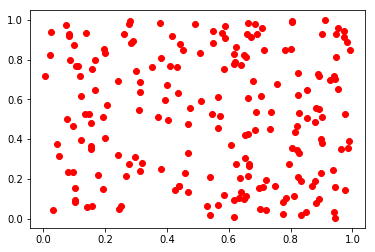

In [8]:
    n_cities = 200
    cities = np.random.random((n_cities, 2))
    plot_cities(cities)
    plt.show()

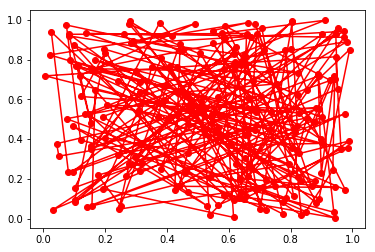

In [9]:
    initial_tour = np.array(range(n_cities))
    plot_tour(initial_tour, cities)
    plt.show()

In [0]:
od_matrix = calculate_od_matrix(cities)

In [18]:
%%timeit
two_opt(initial_tour, od_matrix)

10 loops, best of 3: 37.8 ms per loop


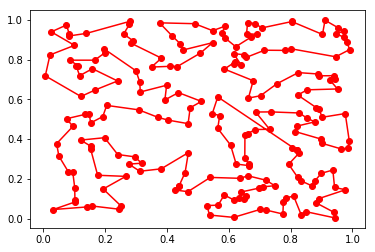

In [19]:
new_tour = two_opt(initial_tour, od_matrix)
plot_tour(new_tour, cities)
plt.show()

In [0]:
fast_flip = jit(cache=True, nopython=True)(flip_ud)
flip_ud = fast_flip
fast_version = jit(cache=True, nopython=True)(two_opt)
fast_version(np.array([1,2]), od_matrix)
fast_version.inspect_types()

In [23]:
%%timeit
fast_version(initial_tour, od_matrix)

10000 loops, best of 3: 87.1 µs per loop


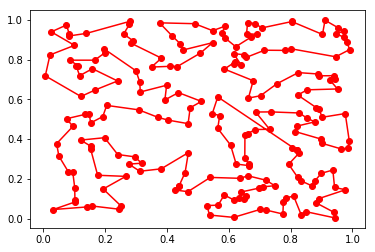

In [27]:
new_tour2 = fast_version(initial_tour, od_matrix)
plot_tour(new_tour2, cities)
plt.show()